In [35]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression

In [36]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as numpyLibrary

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


In [38]:
mnistDataset = fetch_openml('mnist_784', version=1)

In [39]:
Data_value, Target_value = mnistDataset['data'], mnistDataset['target']

In [40]:
#Printing the data shape using the shape function
print(f"The data shape is: {Data_value.shape}")

The data shape is: (70000, 784)


In [41]:
#Printing the target shape using the shape function
print(f"The target shape is: {Target_value.shape}")

The target shape is: (70000,)


In [42]:
DataVakueForDigit = Data_value.iloc[10000].values

In [43]:
DataValueImage = DataVakueForDigit.reshape(28, 28)

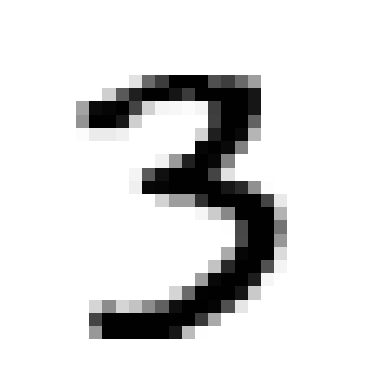

In [44]:
#Plotting the random digit image 
plt.imshow(DataValueImage, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [45]:
Target_value[36001]

'2'

In [46]:
# Convert the data to NumPy arrays if they are not already
Data_value = numpyLibrary.array(Data_value)
Target_value = numpyLibrary.array(Target_value).astype(numpyLibrary.int8)  # Convert the target values to integers

In [47]:
# Split the data into training and test sets
Data_value_train, Data_value_test = Data_value[:60000], Data_value[60000:]
Target_value_train, Target_value_test = Target_value[:60000], Target_value[60000:]

In [48]:
# Shuffle the training data
permutation_shuffle_index = numpyLibrary.random.permutation(60000)
Data_value_train, Target_value_train = Data_value_train[permutation_shuffle_index], Target_value_train[permutation_shuffle_index]

In [49]:
# Creating a 2 detector
Target_value_train_2 = (Target_value_train == 2)
Target_value_test_2 = (Target_value_test == 2)

In [50]:
Target_value_test_2

array([False,  True, False, ..., False, False, False])

In [51]:
Data_classifier = LogisticRegression(tol = 0.1)

In [52]:
Data_classifier.fit(Data_value_train, Target_value_train_2)

LogisticRegression(tol=0.1)

In [53]:
Data_classifier.predict([DataVakueForDigit])

array([False])

In [54]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(Data_classifier, Data_value_train, Target_value_train_2, cv = 3, scoring = "accuracy")

In [55]:
#finding the mean for the cross value score obtained
cv_score.mean()

0.9787833333333333

In [56]:
scaler = StandardScaler()
Data_value_train_scaled = scaler.fit_transform(Data_value_train.astype(numpyLibrary.float64))
Data_value_test_scaled = scaler.transform(Data_value_test.astype(numpyLibrary.float64))


In [57]:
Data_classifier_multiclass = LogisticRegression(tol=0.1, multi_class='multinomial', solver='lbfgs', max_iter=200)
Data_classifier_multiclass.fit(Data_value_train_scaled, Target_value_train)


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial', tol=0.1)

In [58]:
sample_prediction = Data_classifier_multiclass.predict([Data_value_test_scaled[0]])
print(f"Predicted label: {sample_prediction[0]}, Actual label: {Target_value_test[0]}")


Predicted label: 7, Actual label: 7


In [59]:
cv_scores_multiclass = cross_val_score(Data_classifier_multiclass, Data_value_train_scaled, Target_value_train, cv=3, scoring='accuracy')
print(f"Cross-validation scores for multiclass classification: {cv_scores_multiclass}")
print(f"Mean cross-validation score for multiclass classification: {cv_scores_multiclass.mean()}")


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Cross-validation scores for multiclass classification: [0.73535 0.7371  0.7323 ]
Mean cross-validation score for multiclass classification: 0.7349166666666666


In [60]:
predictions_multiclass = Data_classifier_multiclass.predict(Data_value_test_scaled)


In [61]:
conf_matrix_multiclass = confusion_matrix(Target_value_test, predictions_multiclass)
class_report_multiclass = classification_report(Target_value_test, predictions_multiclass)
print("Confusion Matrix for Multiclass Classification:")
print(conf_matrix_multiclass)
print("Classification Report for Multiclass Classification:")
print(class_report_multiclass)



NameError: name 'confusion_matrix' is not defined